#**Decoding Success at Eurovision: A Machine Learning Analysis of Song Topics, Performance Attributes, and Outcomes (2016–2025)**

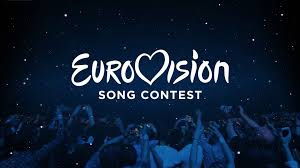

## **Data Collection and Inspection-result dataframe**

### Data Collection

In [1]:
import kagglehub

# Download latest version of dataset of Eurovision result from Kaggie
path = kagglehub.dataset_download("rhyspeploe/eurovision-2016-25")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rhyspeploe/eurovision-2016-25/versions/2


In [2]:
# Import dataset to Google Colab Environment, please uploadda here the file named "eurovision_2016-25.csv". Please note that the previous step is to show how did I get the data, but the dataset from Kaggie did not include the result of 2025, I manually input the result, that's why a new version needs to be uploaded.
from google.colab import files
uploaded = files.upload()

Saving eurovision_2016-25.csv to eurovision_2016-25 (1).csv


In [3]:
# Read in the result file
import pandas as pd
result = pd.read_csv(
    "eurovision_2016-25.csv",
    encoding="ISO-8859-1"
)

### Data Inspection

In [4]:
# Inspect the head
result.head()

,Year,Country,Song,Artist,Final_Place,Final_Points,Top 5,Top 10,Running_Order_Final,Grand_Final_Ind,...,Language4,Multiple_Language,National_Language_Used,EU,NATO,Country_Group,MyESB_Community,MyESB_Personal,OGAE_Points,Qualification_Record
0,2025,Albania,Zjerm,Shkodra Elektronike,8.0,218.0,0.0,1.0,26.0,1,...,NaN,0,True,0,1,Southern,4,17,158,0.550000
1,2025,Armenia,Survivor,Parg,20.0,72.0,0.0,0.0,18.0,1,...,NaN,0,False,0,0,South-Eastern,30,30,0,0.812500
2,2025,Australia,Milkshake Man,Go-Jo,NaN,NaN,NaN,NaN,NaN,0,...,NaN,0,True,0,0,Western,17,21,15,0.777778
3,2025,Austria,Wasted Love,JJ,1.0,436.0,1.0,1.0,9.0,1,...,NaN,0,False,1,0,Central,1,11,382,0.562500
4,2025,Azerbaijan,Run with U,Mamagama,NaN,NaN,NaN,NaN,NaN,0,...,NaN,0,False,0,0,South-Eastern,32,18,0,0.812500


In [5]:
# Check basic information of the result dataset
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    358 non-null    int64  
 1   Country                 358 non-null    object 
 2   Song                    358 non-null    object 
 3   Artist                  358 non-null    object 
 4   Final_Place             232 non-null    float64
 5   Final_Points            232 non-null    float64
 6   Top 5                   304 non-null    float64
 7   Top 10                  309 non-null    float64
 8   Running_Order_Final     233 non-null    float64
 9   Grand_Final_Ind         358 non-null    int64  
 10  Big6_Ind                358 non-null    int64  
 11  Semi_Final_Num          305 non-null    float64
 12  Semi_Place              305 non-null    float64
 13  Semi_Points             305 non-null    float64
 14  Running_Order_Semi      305 non-null    fl

In [6]:
# Inspect for missing value
result.isna().sum()

,0
Year,0
Country,0
Song,0
Artist,0
Final_Place,126
Final_Points,126
Top 5,54
Top 10,49
Running_Order_Final,125
Grand_Final_Ind,0


## **Data Collection, Inspection and Cleaning-lyrics dataframe**

### Data Collection

In [7]:
import kagglehub

# Download latest version dataset of lyrics
path = kagglehub.dataset_download("minitree/eurovision-song-lyrics")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/eurovision-song-lyrics


In [8]:
import json
import pandas as pd

# Read in the lyrics file, please note that the downloading path might be different, so you could put the path here or upload it.
json_file_path = f"/root/.cache/kagglehub/datasets/minitree/eurovision-song-lyrics/versions/10//eurovision-lyrics-2025.json"
with open(json_file_path, encoding="utf-8") as f:
    lyrics_raw = json.load(f)

### Data Inspection

In [9]:
# Normalize the json file, and create a Dataframe
lyrics = pd.DataFrame.from_dict(lyrics_raw, orient='index')

In [10]:
# Inspect the head of lyrics df
lyrics.head()

,#,Country,#.1,Artist,Song,Language,Place,Score,Eurovision Number,Year,Host Country,Host City,Lyrics,Lyrics translation
0,1,Netherlands,1,Jetty Paerl,De vogels van Holland,Dutch,-,-,1,1956,Switzerland,Lugano,De vogels van Holland zijn zo muzikaal\nZe ler...,The birds of Holland are so musical\nThey alre...
1,2,Switzerland,1,Lys Assia,Das alte Karussell,German,-,-,1,1956,Switzerland,Lugano,Das alte Karussell\nDas geht nicht mehr so sch...,The old carousel\nIt doesn't go as fast anymor...
2,3,Belgium,1,Fud Leclerc,Messieurs les noyés de la Seine,French,-,-,1,1956,Switzerland,Lugano,Messieurs les noyés de la Seine\nOuvrez-moi le...,Ye drowned men of the river Seine (1)\nOpen th...
3,4,Germany (West),1,Walter Andreas Schwarz,Im Wartesaal zum großen Glück,German,-,-,1,1956,Switzerland,Lugano,Es gibt einen Hafen\nDa fährt kaum ein Schiff\...,There is a harbour\nWhere hardly any ship leav...
4,5,France,1,Mathé Altéry,Le temps perdu,French,-,-,1,1956,Switzerland,Lugano,"Chante, carillon\nLe chant du temps perdu\nCha...","Sing, carillon\nThe song of lost time\nSing yo..."


In [11]:
# Inspect lyrics df info
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 1794
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   1795 non-null   object
 1   Country             1795 non-null   object
 2   #.1                 1795 non-null   object
 3   Artist              1795 non-null   object
 4   Song                1795 non-null   object
 5   Language            1795 non-null   object
 6   Place               1795 non-null   object
 7   Score               1795 non-null   object
 8   Eurovision Number   1795 non-null   int64 
 9   Year                1795 non-null   object
 10  Host Country        1795 non-null   object
 11  Host City           1795 non-null   object
 12  Lyrics              1795 non-null   object
 13  Lyrics translation  1795 non-null   object
dtypes: int64(1), object(13)
memory usage: 274.9+ KB


### Data Cleaning

In [12]:
# Change the datatype of year to int
lyrics['Year'] = pd.to_numeric(lyrics['Year'], errors='coerce')

In [13]:
#Filter the songs from 2016-2025
lyrics_filtered = lyrics[lyrics['Year'].between(2016, 2025)]

In [14]:
# Inspect the sliced dataframe
lyrics_filtered.head()

,#,Country,#.1,Artist,Song,Language,Place,Score,Eurovision Number,Year,Host Country,Host City,Lyrics,Lyrics translation
1396,1397,Finland,50,Sandhja,Sing It Away,English,-,-,61,2016,Sweden,Stockholm,[Verse 1]\nPlease believe me when I say\nThere...,English
1397,1398,Greece,37,Argo,Utopian Land,Greek/English (Pontic Greek),-,-,61,2016,Sweden,Stockholm,We’re the rise in the rising sun\nDance with u...,We are the rise in the rising sun\nDance with ...
1398,1399,Moldova,12,Lidia Isac,Falling Stars,English,-,-,61,2016,Sweden,Stockholm,"[Verse 1]\nLost in time, you’re miles away\nI ...",English
1399,1400,Hungary,14,Freddie,Pioneer,English,19,108,61,2016,Sweden,Stockholm,[Verse 1: Freddie]\nWhen you need to run away\...,English
1400,1401,Croatia,22,Nina Kraljić,Lighthouse,English,23,73,61,2016,Sweden,Stockholm,[Verse 1]\nLightning strikes on the sea\nBreak...,English


In [15]:
# Normalize the language value
lyrics_filtered["Language"] = lyrics_filtered["Language"].str.strip()

<ipython-input-15-82c50204acca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_filtered["Language"] = lyrics_filtered["Language"].str.strip()


In [16]:
# Create a function that only when the language is English, then it takes the value od column "Lyrics", otherwise take the value of "lyrics translation", and create a new column for the final lyrics
lyrics_filtered["Lyrics_Final"] = lyrics_filtered.apply(
    lambda row: row["Lyrics"]
    if row["Language"] == "English"
    else row["Lyrics translation"],
    axis=1
)

<ipython-input-16-157453347d81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_filtered["Lyrics_Final"] = lyrics_filtered.apply(


In [17]:
# Check for nulls or missing final lyrics
print(lyrics_filtered["Lyrics_Final"].isna().sum())

0


In [18]:
# Inspect the new column
lyrics_filtered.head()

,#,Country,#.1,Artist,Song,Language,Place,Score,Eurovision Number,Year,Host Country,Host City,Lyrics,Lyrics translation,Lyrics_Final
1396,1397,Finland,50,Sandhja,Sing It Away,English,-,-,61,2016,Sweden,Stockholm,[Verse 1]\nPlease believe me when I say\nThere...,English,[Verse 1]\nPlease believe me when I say\nThere...
1397,1398,Greece,37,Argo,Utopian Land,Greek/English (Pontic Greek),-,-,61,2016,Sweden,Stockholm,We’re the rise in the rising sun\nDance with u...,We are the rise in the rising sun\nDance with ...,We are the rise in the rising sun\nDance with ...
1398,1399,Moldova,12,Lidia Isac,Falling Stars,English,-,-,61,2016,Sweden,Stockholm,"[Verse 1]\nLost in time, you’re miles away\nI ...",English,"[Verse 1]\nLost in time, you’re miles away\nI ..."
1399,1400,Hungary,14,Freddie,Pioneer,English,19,108,61,2016,Sweden,Stockholm,[Verse 1: Freddie]\nWhen you need to run away\...,English,[Verse 1: Freddie]\nWhen you need to run away\...
1400,1401,Croatia,22,Nina Kraljić,Lighthouse,English,23,73,61,2016,Sweden,Stockholm,[Verse 1]\nLightning strikes on the sea\nBreak...,English,[Verse 1]\nLightning strikes on the sea\nBreak...


##**Topic Modelling- Unsuperivised Machine Learning**

### LDA Model

In [20]:
# Import packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Determine documents for LDA and BERTopic
documents = lyrics_filtered["Lyrics_Final"].tolist()

In [22]:
# Determine the vectorizer
vectorizer = CountVectorizer(stop_words="english", max_df=0.95, min_df=5)

In [23]:
# Fit the LDA model
# Turn our text data into a matrix of token counts
X = vectorizer.fit_transform(documents)
# Set up the LDA model to find 10 topics in the data
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
# Run LDA on our word count matrix – this gives us topic probabilities for each doc
lda_topics = lda_model.fit_transform(X)
# For each doc, grab the topic with the highest score (i.e., the one it’s mostly about)
lda_topic_assignments = lda_topics.argmax(axis=1)
# Add those topic labels back into our DataFrame so we can see what topic each doc got
lyrics_filtered["LDA_Topic"] = lda_topic_assignments

In [24]:
# Inspect the LDA topic
lyrics_filtered.head()

,#,Country,#.1,Artist,Song,Language,Place,Score,Eurovision Number,Year,Host Country,Host City,Lyrics,Lyrics translation,Lyrics_Final,LDA_Topic
1396,1397,Finland,50,Sandhja,Sing It Away,English,-,-,61,2016,Sweden,Stockholm,[Verse 1]\nPlease believe me when I say\nThere...,English,[Verse 1]\nPlease believe me when I say\nThere...,8
1397,1398,Greece,37,Argo,Utopian Land,Greek/English (Pontic Greek),-,-,61,2016,Sweden,Stockholm,We’re the rise in the rising sun\nDance with u...,We are the rise in the rising sun\nDance with ...,We are the rise in the rising sun\nDance with ...,0
1398,1399,Moldova,12,Lidia Isac,Falling Stars,English,-,-,61,2016,Sweden,Stockholm,"[Verse 1]\nLost in time, you’re miles away\nI ...",English,"[Verse 1]\nLost in time, you’re miles away\nI ...",0
1399,1400,Hungary,14,Freddie,Pioneer,English,19,108,61,2016,Sweden,Stockholm,[Verse 1: Freddie]\nWhen you need to run away\...,English,[Verse 1: Freddie]\nWhen you need to run away\...,6
1400,1401,Croatia,22,Nina Kraljić,Lighthouse,English,23,73,61,2016,Sweden,Stockholm,[Verse 1]\nLightning strikes on the sea\nBreak...,English,[Verse 1]\nLightning strikes on the sea\nBreak...,2


In [25]:
def print_lda_topics(lda_model, vectorizer, n_top_words=10):
  # Get all the actual words (features) the model learned from
    feature_names = vectorizer.get_feature_names_out()
    # Loop through each topic found by the LDA model
    for idx, topic in enumerate(lda_model.components_):
       # Get the top N words for this topic (the ones with the highest weight)
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
         # Print the topic number and its top words
        print(f"Topic {idx}: {' | '.join(top_words)}")

In [26]:
# Show the top words for each topic in the trained LDA model
print_lda_topics(lda_model, vectorizer)

Topic 0: love | ll | chorus | yeah | way | gonna | light | verse | tonight | make
Topic 1: la | like | falling | heart | life | sun | blood | just | hold | voice
Topic 2: na | know | ll | life | hey | say | like | high | sound | hope
Topic 3: oh | just | don | pa | feel | chorus | good | cause | wanna | bigger
Topic 4: ooh | love | heart | look | know | don | need | friend | cause | ll
Topic 5: like | gonna | baby | know | don | ll | tell | time | going | ya
Topic 6: love | don | got | ain | know | chorus | like | cause | come | scared
Topic 7: ah | ich | walking | chorus | holding | water | ve | die | fly | running
Topic 8: away | run | sing | right | night | make | come | far | land | gonna
Topic 9: let | don | ll | like | want | know | dance | say | feel | hear


In [27]:
# I manually put a topic label for each topic, map the label here
topic_labels = {
    0: "Romantic/Intimate",
    1: "Emotional/Inspirational",
    2: "Energetic/Upbeat Chant",
    3: "Fun/Party Anthem",
    4: "Love & Friendship",
    5: "Relationship Conflict",
    6: "Vulnerability/Overcoming",
    7: "Dreamy/Abstract Imagery",
    8: "Journey/Escape",
    9: "Celebration/Desire"
}

# Apply to DataFrame
lyrics_filtered["LDA_Topic_Label"] = lyrics_filtered["LDA_Topic"].map(topic_labels)


In [28]:
# Inspect the LDA topic label
lyrics_filtered.head()

,#,Country,#.1,Artist,Song,Language,Place,Score,Eurovision Number,Year,Host Country,Host City,Lyrics,Lyrics translation,Lyrics_Final,LDA_Topic,LDA_Topic_Label
1396,1397,Finland,50,Sandhja,Sing It Away,English,-,-,61,2016,Sweden,Stockholm,[Verse 1]\nPlease believe me when I say\nThere...,English,[Verse 1]\nPlease believe me when I say\nThere...,8,Journey/Escape
1397,1398,Greece,37,Argo,Utopian Land,Greek/English (Pontic Greek),-,-,61,2016,Sweden,Stockholm,We’re the rise in the rising sun\nDance with u...,We are the rise in the rising sun\nDance with ...,We are the rise in the rising sun\nDance with ...,0,Romantic/Intimate
1398,1399,Moldova,12,Lidia Isac,Falling Stars,English,-,-,61,2016,Sweden,Stockholm,"[Verse 1]\nLost in time, you’re miles away\nI ...",English,"[Verse 1]\nLost in time, you’re miles away\nI ...",0,Romantic/Intimate
1399,1400,Hungary,14,Freddie,Pioneer,English,19,108,61,2016,Sweden,Stockholm,[Verse 1: Freddie]\nWhen you need to run away\...,English,[Verse 1: Freddie]\nWhen you need to run away\...,6,Vulnerability/Overcoming
1400,1401,Croatia,22,Nina Kraljić,Lighthouse,English,23,73,61,2016,Sweden,Stockholm,[Verse 1]\nLightning strikes on the sea\nBreak...,English,[Verse 1]\nLightning strikes on the sea\nBreak...,2,Energetic/Upbeat Chant


### BERT Topic

In [29]:
# Dropping rows where "Lyrics_Final" is NaN
lyrics_df = lyrics_filtered.dropna(subset=["Lyrics_Final"])
# Excluding rows where "Lyrics_Final" is "english", empty, "none", or "nan"
lyrics_df = lyrics_df[~lyrics_df["Lyrics_Final"].str.strip().str.lower().isin(["english", "", "none", "nan"])]

In [30]:
# Keep only rows where the lyrics have more than 3 words
lyrics_df = lyrics_df[lyrics_df["Lyrics_Final"].str.split().str.len() > 3]

In [31]:
import re
import nltk
from nltk.corpus import stopwords
# Download stopwords
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Load English stop words into a set for faster lookup
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

# Function to clean text: remove newlines, non-letter characters, lowercase, and remove stopwords
def clean_text(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    words = text.lower().split()
    return " ".join([w for w in words if w not in ENGLISH_STOP_WORDS])

# Apply cleaning function to lyrics
lyrics_df["Lyrics_Cleaned"] = lyrics_df["Lyrics_Final"].apply(clean_text)

In [32]:
from sentence_transformers import SentenceTransformer
# Convert cleaned lyrics into a list of documents
docs = lyrics_df["Lyrics_Cleaned"].tolist()

# Load a pre-trained transformer model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Generate sentence embeddings for each document with a progress bar
embeddings = embedding_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [33]:
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

# Initialize KMeans clustering with a fixed number of clusters (topics)
kmeans_model = KMeans(n_clusters=10, random_state=42)

# Initialize BERTopic with precomputed embedding model and KMeans clustering
bertopic_model = BERTopic(embedding_model=embedding_model, hdbscan_model=kmeans_model)

# Fit the BERTopic model on the documents and their embeddings to extract topics and probabilities
topics, probs = bertopic_model.fit_transform(docs, embeddings)

In [34]:
# Assign the predicted BERTopic topic for each document to the DataFrame
lyrics_df["BERT_Topic"] = topics

In [35]:
# Extract the info of BERTopic
bertopic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,57,0_love_like_sowing_night,"[love, like, sowing, night, lover, never, good...",[heart hand eyes hips nothings mine anymore ki...
1,1,47,1_oh_chorus_im_verse,"[oh, chorus, im, verse, go, take, cant, precho...",[verse youre lost game love repeating always a...
2,2,46,2_poe_yum_la_cha,"[poe, yum, la, cha, like, im, know, freaky, do...",[cleopatra queen like like yeah like straight ...
3,3,43,3_dont_im_feel_love,"[dont, im, feel, love, want, time, let, like, ...",[dont feel buzz name comes phone anymore feels...
4,4,34,4_heart_im_love_let,"[heart, im, love, let, hope, still, falling, k...",[tell us tell love baby trust want know feel u...
5,5,33,5_sing_away_ea_ich,"[sing, away, ea, ich, one, ey, stars, hear, ya...",[ich ballalalalalalaler lcher die nacht sterne...
6,6,33,6_na_bam_mamma_im,"[na, bam, mamma, im, dance, gonna, got, dont, ...",[nothing average even though im special cant r...
7,7,32,7_yeah_ill_im_love,"[yeah, ill, im, love, dont, baby, time, never,...",[world got going crazy ill carry remember told...
8,8,30,8_oh_love_bigger_feel,"[oh, love, bigger, feel, chorus, verse, waitin...",[verse always feel like need try believe need ...
9,9,24,9_sauna_im_fire_burns,"[sauna, im, fire, burns, survivor, burning, ca...",[see air see air im running ashes like firefig...


In [36]:
# Asign the topics in a DataFrame
topic_info = bertopic_model.get_topic_info()

In [37]:
import pandas as pd

# Show all rows and all columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Print the full DataFrame
print(topic_info)


   Topic  Count                      Name  \
0      0     57  0_love_like_sowing_night   
1      1     47      1_oh_chorus_im_verse   
2      2     46          2_poe_yum_la_cha   
3      3     43       3_dont_im_feel_love   
4      4     34       4_heart_im_love_let   
5      5     33        5_sing_away_ea_ich   
6      6     33         6_na_bam_mamma_im   
7      7     32        7_yeah_ill_im_love   
8      8     30     8_oh_love_bigger_feel   
9      9     24     9_sauna_im_fire_burns   

                                                          Representation  \
0       [love, like, sowing, night, lover, never, good, kiss, give, sun]   
1        [oh, chorus, im, verse, go, take, cant, prechorus, never, dont]   
2                [poe, yum, la, cha, like, im, know, freaky, dont, diva]   
3              [dont, im, feel, love, want, time, let, like, ive, never]   
4        [heart, im, love, let, hope, still, falling, know, would, keep]   
5                 [sing, away, ea, ich, one, ey,

In [38]:
# I manually put a topic label for each topic, map the label here

topic_labels = {
    0: "Romantic Loneliness",
    1: "Emotional Breakup",
    2: "Performance & Confidence",
    3: "Self-Love / Creativity",
    4: "Seduction & Regret",
    5: "Dance & Party",
    6: "Nonsense / Playful Chant",
    7: "Intensity / Passion",
    8: "Chanting / Hype",
    9: "Feminine Power / Diva"
}

In [39]:
# Map numerical BERT topic IDs to descriptive labels
lyrics_df["BERT_Topic_Label"] = lyrics_df["BERT_Topic"].map(topic_labels)

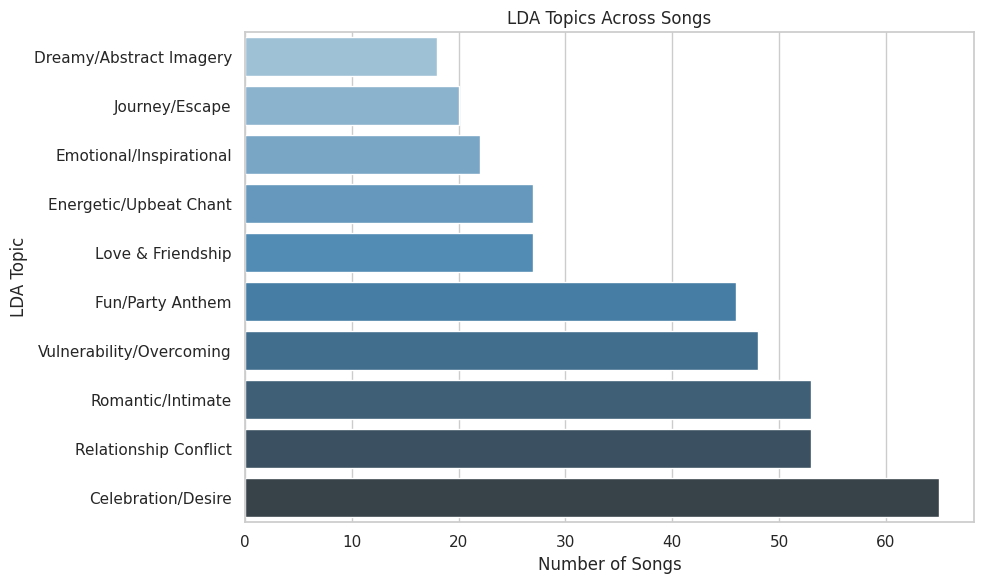

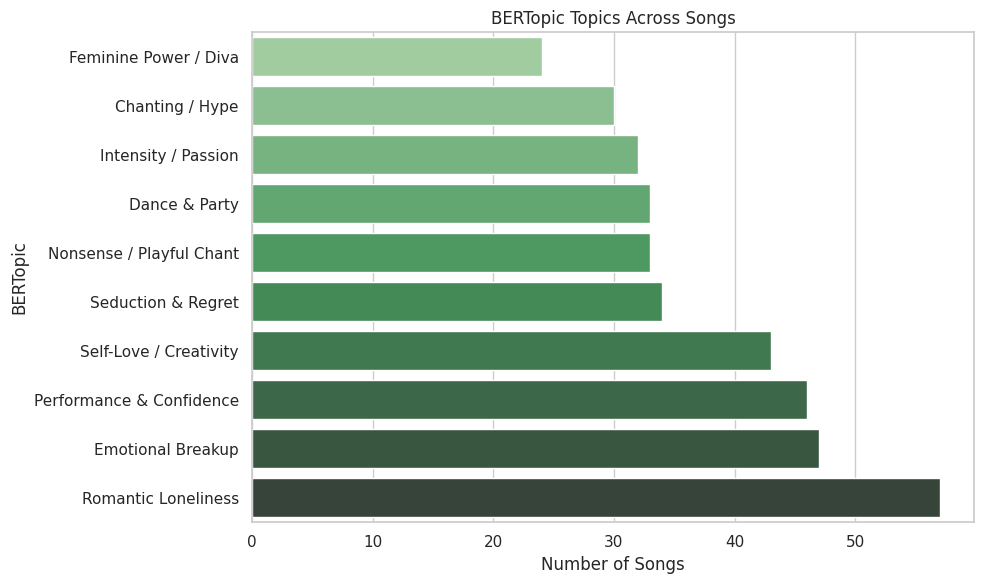

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Sort topics by count
lda_order = lyrics_df["LDA_Topic_Label"].value_counts().sort_values().index

# LDA plot: Horizontal bars for clarity
sns.countplot(
    y="LDA_Topic_Label",
    data=lyrics_df,
    order=lda_order,
    palette="Blues_d"
)
plt.title("LDA Topics Across Songs")
plt.xlabel("Number of Songs")
plt.ylabel("LDA Topic")
plt.tight_layout()
plt.show()

# BERTopic plot: similar chart
plt.figure(figsize=(10, 6))
bert_order = lyrics_df["BERT_Topic_Label"].value_counts().sort_values().index

sns.countplot(
    y="BERT_Topic_Label",
    data=lyrics_df,
    order=bert_order,
    palette="Greens_d"
)
plt.title("BERTopic Topics Across Songs")
plt.xlabel("Number of Songs")
plt.ylabel("BERTopic")
plt.tight_layout()
plt.show()

## **Statistical Testing and Supervised Machine Learning Model Selection**

### Merging

In [41]:
# Inspect the column names for merging
print(lyrics_df.columns)
print(result.columns)

Index(['#', 'Country', '#.1', 'Artist', 'Song', 'Language', 'Place', 'Score',
       'Eurovision Number', 'Year', 'Host Country', 'Host City', 'Lyrics',
       'Lyrics translation', 'Lyrics_Final', 'LDA_Topic', 'LDA_Topic_Label',
       'Lyrics_Cleaned', 'BERT_Topic', 'BERT_Topic_Label'],
      dtype='object')
Index(['Year', 'Country ', 'Song ', 'Artist ', 'Final_Place', 'Final_Points',
       'Top 5', 'Top 10', 'Running_Order_Final', 'Grand_Final_Ind', 'Big6_Ind',
       'Semi_Final_Num', 'Semi_Place', 'Semi_Points', 'Running_Order_Semi',
       'National_Final', 'Solo_Artist', 'Sex', 'Returning_Artist_Ind',
       'Number of Members', 'Language1', 'Language2', 'Language3', 'Language4',
       'Multiple_Language', 'National_Language_Used', 'EU', 'NATO',
       'Country_Group', 'MyESB_Community', 'MyESB_Personal', 'OGAE_Points',
       'Qualification_Record'],
      dtype='object')


In [42]:
import re
import unicodedata

# Function to normalize and clean country names
def clean_country(c):
    c = str(c).lower() # Convert to lowercase
    c = re.sub(r"\(.*?\)", "", c)  # Remove (2), etc.
    c = re.sub(r"[^a-z ]", "", c).strip() # Remove non-alphabetic characters
    return c

# Apply cleaning function to prepare country names for merging
lyrics_df["Country_Merge"] = lyrics_df["Country"].apply(clean_country)
result["Country_Merge"] = result["Country "].apply(clean_country)


In [43]:
# Check the length of two Dataframe for merging
print("Lyrics rows:", len(lyrics_df))
print("Result rows:", len(result))

Lyrics rows: 379
Result rows: 358


In [44]:
# Check the length of two Dataframe for merging
result['Country_Merge'].value_counts()

,count
Country_Merge,
albania,9
australia,9
azerbaijan,9
austria,9
belgium,9
croatia,9
estonia,9
cyprus,9
czech republic,9


In [45]:
# Check the length of two Dataframe for merging
lyrics_df['Country_Merge'].value_counts()

,count
Country_Merge,
finland,10
greece,10
austria,10
estonia,10
iceland,10
united kingdom,10
sweden,10
albania,10
slovenia,10


In [46]:
# Merge two datasets
merged_df = pd.merge(
    lyrics_df,
    result,
    on=["Year", "Country_Merge"],
    how="right"
)
print("Matched entries:", len(merged_df))

Matched entries: 358


In [47]:
# Inspect merged DataFrame
merged_df.head()

,#,Country,#.1,Artist,Song,Language,Place,Score,Eurovision Number,Year,Host Country,Host City,Lyrics,Lyrics translation,Lyrics_Final,LDA_Topic,LDA_Topic_Label,Lyrics_Cleaned,BERT_Topic,BERT_Topic_Label,Country_Merge,Country,Song,Artist,Final_Place,Final_Points,Top 5,Top 10,Running_Order_Final,Grand_Final_Ind,Big6_Ind,Semi_Final_Num,Semi_Place,Semi_Points,Running_Order_Semi,National_Final,Solo_Artist,Sex,Returning_Artist_Ind,Number of Members,Language1,Language2,Language3,Language4,Multiple_Language,National_Language_Used,EU,NATO,Country_Group,MyESB_Community,MyESB_Personal,OGAE_Points,Qualification_Record
0,1759,Albania,-,Shkodra Elektronike,Zjerm,Albanian,-,-,69.0,2025,Switzerland,Basel,"Në këtë minutë,\nNë këtë çast,\nNo paranoia.\nPas shiut,\nE ylbertë duket bota.\nNëpër rrugë,\nAsnjë ambulance.\nKurrkush s’të flet\nMe arrogance.\nEdhe sot na thane,\nQë s’prishet koha.\nPërfundova nën ujë\nKurrë s’mu tha goja.\nImagjino një minutë\nPa ushtarë,\nPa jetimë.\nAsnjë shishe në oqean.\nNaftës i vjen era jargavan.\nlirinë e fjalës\nT’a mëson shkolla\nKrijo në mua një zemër t’pastër.\nNë natën time, të dërgoj dritën.\nAman miserere.\nAman miserere.\nNë zemrën time.\nNë zemrën time.\nKy minutë do të vazhdojë.\nNjerëzit e mirë.\nNjerëzit e mirë\nKërcejnë valle në shpirt.\nJarna ne ti toka ime,\nKu kam lindë s’do të harroj.\nJarna ne ti bota ime,\nVazhdo më shndrit,\nShndrit,\nShndrit,\nShndrit,\nShndrit.\nZjerm!\nBjer mbi vallet tona tribale,\nQë ushtojnë sa orteku kur bjen n’male.\nZjerm!\nNjerëzit pa emën e njerëzit e dlirtë,\nNjësoj këputen e bijnë.\nSi 7 thika që t’ngulen n’shpirt.\nZjerm!\nKëtu flen deti, rana e hana.\nE yjet s’i shohim se yjet na i shkel Kamba.\nKur ecim n’jerm.\nZjerm!\nJena t’untë për flakë e dritë,\nE t’kërkojmë...\nN’kyt terr që s’pranë tuej shndritë\nKrijo në mua jë zemër t’pastër\nNë natën time, të dërgoj dritën\nAman miserere\nAman miserere\nKrijo në mua jë zemër t’pastër\nNë natën time, të dërgoj dritën\nAman miserere\nAman miserere\nNë zemrën time\nNë zemrën time\nKy minutë do të vazhdojë.\nNjerëzit e mire.\nNjerëzit e mire.\nKërcejnë valle në shpirt.\nJarna ne ti toka ime.\nKu kam lindë s’do të harroj.\nJarna ne ti bota ime,\nvazhdo më shndrit\nShndrit,\nShndrit.","At this minute,\nAt this moment,\nNo more paranoia.\nAfter the rain\nThe world seems like a rainbow.\nNo ambulances\nRoaming the streets,\nNo one arrogantly speaks.\nForecast for today, true:\nThe skies still will be blue.\nEnding under the water,\nMy mouth never dried up.\nImagine a minute, try,\nWithout soldiers,\nWith no orphans crying.\nNo bottles in the ocean,\nDiesel smelling like lilac.\nThe freedom of speech\nTaught in a school class.\nCarve in me a clean heart,\nI’ll send the light,\nIn my darkness, night.\nAman, miserere!\nAman, miserere!\nIn my heart,\nIn this heart of mine,\nThis minute eternally lasts,\nGood people blast.\nDecent people,\nDance in their soul\nHey, hop my soil!\nI’ll never forget the cradle I was born\nOh, hey, my world\nKeep shining on me!\nEnlighten!\nShine!\nSplendidly shine!\nShine on!\nFire!\nFall upon our tribal wild dances,\nAs avalanche echoes\nOn mountains, rolls down.\nFire!\nThe nameless and pure people,\nFall and roll down the same\nAs seven knives the soul straightly pierce.\nFire!\nHere the sea, the sand and the moon sleep,\nAnd the stars we do not see\nTrampled under the feet,\nSleepwalking to be free.\nFire!\nFor flames and light starving,\nFor you endlessly searching,\nIn this shining darkness thirsting for brightness.\nCarve in me a clean heart\nIn the darkness, I’ll send you the light\nAman, miserere!\nAman, miserere!\nIn my pulsating heart,\nIn my beating heart!\nThis minute will keep on keeping on,\nDecent beings,\nGood people,\nDance around in their soul.\nHey, hop my soil!\nI’ll never forget the cradle I was born\nOh, hey, my beloved world,\nKeep shining on me!\nShine!\nShine on!","At this minute,\nAt this moment,\nNo more paranoia.\nAfter the rain\nThe world seems like a rainbow.\nNo ambu

In [48]:
# Check the columns
print(merged_df.columns)

Index(['#', 'Country', '#.1', 'Artist', 'Song', 'Language', 'Place', 'Score',
       'Eurovision Number', 'Year', 'Host Country', 'Host City', 'Lyrics',
       'Lyrics translation', 'Lyrics_Final', 'LDA_Topic', 'LDA_Topic_Label',
       'Lyrics_Cleaned', 'BERT_Topic', 'BERT_Topic_Label', 'Country_Merge',
       'Country ', 'Song ', 'Artist ', 'Final_Place', 'Final_Points', 'Top 5',
       'Top 10', 'Running_Order_Final', 'Grand_Final_Ind', 'Big6_Ind',
       'Semi_Final_Num', 'Semi_Place', 'Semi_Points', 'Running_Order_Semi',
       'National_Final', 'Solo_Artist', 'Sex', 'Returning_Artist_Ind',
       'Number of Members', 'Language1', 'Language2', 'Language3', 'Language4',
       'Multiple_Language', 'National_Language_Used', 'EU', 'NATO',
       'Country_Group', 'MyESB_Community', 'MyESB_Personal', 'OGAE_Points',
       'Qualification_Record'],
      dtype='object')


### Exploratory Analysis

In [49]:
# Compute the average Final_Place for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Final_Place"].mean().sort_values(ascending=False)

,Final_Place
LDA_Topic_Label,
Romantic/Intimate,15.096774
Fun/Party Anthem,14.552632
Energetic/Upbeat Chant,14.545455
Celebration/Desire,14.500000
Love & Friendship,14.411765
Vulnerability/Overcoming,13.695652
Emotional/Inspirational,13.000000
Journey/Escape,12.250000
Relationship Conflict,11.225806


In [50]:
# Compute the average Final_Points for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Final_Points"].mean().sort_values(ascending=False)

,Final_Points
LDA_Topic_Label,
Dreamy/Abstract Imagery,242.166667
Relationship Conflict,232.129032
Vulnerability/Overcoming,197.434783
Emotional/Inspirational,164.818182
Energetic/Upbeat Chant,164.636364
Journey/Escape,164.000000
Fun/Party Anthem,158.868421
Celebration/Desire,155.031250
Love & Friendship,147.470588


In [51]:
# Compute the average probability to get intio final for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Grand_Final_Ind"].mean().sort_values(ascending=False)

,Grand_Final_Ind
LDA_Topic_Label,
Fun/Party Anthem,0.866667
Love & Friendship,0.708333
Dreamy/Abstract Imagery,0.705882
Relationship Conflict,0.673913
Romantic/Intimate,0.659574
Celebration/Desire,0.615385
Emotional/Inspirational,0.611111
Vulnerability/Overcoming,0.547619
Energetic/Upbeat Chant,0.500000


In [52]:
# Compute the average probability to get intio Top5 for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Top 5"].mean().sort_values(ascending=False)

,Top 5
LDA_Topic_Label,
Relationship Conflict,0.222222
Vulnerability/Overcoming,0.151515
Dreamy/Abstract Imagery,0.125000
Fun/Party Anthem,0.108108
Celebration/Desire,0.090909
Love & Friendship,0.047619
Romantic/Intimate,0.023256
Journey/Escape,0.000000
Emotional/Inspirational,0.000000


In [53]:
# Compute the average probability to get intio Top 10 for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Top 10"].mean().sort_values(ascending=False)

,Top 10
LDA_Topic_Label,
Relationship Conflict,0.394737
Dreamy/Abstract Imagery,0.235294
Celebration/Desire,0.222222
Fun/Party Anthem,0.216216
Vulnerability/Overcoming,0.151515
Emotional/Inspirational,0.125000
Love & Friendship,0.095238
Romantic/Intimate,0.068182
Journey/Escape,0.000000


In [54]:
# Compute the average Semi final place for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Semi_Place"].mean().sort_values(ascending=False)

,Semi_Place
LDA_Topic_Label,
Journey/Escape,12.562500
Energetic/Upbeat Chant,10.333333
Vulnerability/Overcoming,10.250000
Romantic/Intimate,9.837209
Relationship Conflict,9.062500
Celebration/Desire,9.021739
Emotional/Inspirational,8.500000
Love & Friendship,8.238095
Dreamy/Abstract Imagery,7.230769


In [55]:
# Compute the average Semi final points for each LDA topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("LDA_Topic_Label")["Semi_Points"].mean().sort_values(ascending=False)

,Semi_Points
LDA_Topic_Label,
Dreamy/Abstract Imagery,146.769231
Fun/Party Anthem,132.500000
Love & Friendship,122.000000
Romantic/Intimate,115.255814
Relationship Conflict,113.906250
Emotional/Inspirational,113.625000
Celebration/Desire,110.260870
Energetic/Upbeat Chant,106.047619
Vulnerability/Overcoming,99.416667


In [56]:
# Compute the average probability to get intio Top5 for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Top 5"].mean().sort_values(ascending=False)

,Top 5
BERT_Topic_Label,
Performance & Confidence,0.250000
Nonsense / Playful Chant,0.142857
Seduction & Regret,0.142857
Romantic Loneliness,0.135135
Feminine Power / Diva,0.125000
Self-Love / Creativity,0.074074
Intensity / Passion,0.040000
Dance & Party,0.033333
Chanting / Hype,0.000000


In [57]:
# Compute the average probability to get intio Top10 for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Top 10"].mean().sort_values(ascending=False)

,Top 10
BERT_Topic_Label,
Performance & Confidence,0.342857
Self-Love / Creativity,0.296296
Feminine Power / Diva,0.294118
Romantic Loneliness,0.210526
Nonsense / Playful Chant,0.190476
Seduction & Regret,0.190476
Intensity / Passion,0.160000
Dance & Party,0.100000
Emotional Breakup,0.023256


In [58]:
# Compute the average Final_Points for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Final_Points"].mean().sort_values(ascending=False)

,Final_Points
BERT_Topic_Label,
Seduction & Regret,236.923077
Nonsense / Playful Chant,233.333333
Performance & Confidence,204.225806
Dance & Party,193.058824
Emotional Breakup,168.933333
Chanting / Hype,164.666667
Self-Love / Creativity,157.260870
Romantic Loneliness,157.100000
Feminine Power / Diva,130.842105


In [59]:
# Compute the average Final_Place for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Final_Place"].mean().sort_values(ascending=False)

,Final_Place
BERT_Topic_Label,
Feminine Power / Diva,15.947368
Intensity / Passion,15.800000
Romantic Loneliness,15.000000
Chanting / Hype,14.722222
Self-Love / Creativity,14.652174
Emotional Breakup,13.866667
Dance & Party,12.058824
Seduction & Regret,11.846154
Performance & Confidence,11.225806


In [60]:
# Compute the average probability to get intio final for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Grand_Final_Ind"].mean().sort_values(ascending=False)

,Grand_Final_Ind
BERT_Topic_Label,
Feminine Power / Diva,0.904762
Performance & Confidence,0.720930
Nonsense / Playful Chant,0.692308
Emotional Breakup,0.681818
Self-Love / Creativity,0.676471
Romantic Loneliness,0.666667
Chanting / Hype,0.620690
Intensity / Passion,0.533333
Dance & Party,0.515152


In [61]:
# Compute the average Semi final place for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Semi_Place"].mean().sort_values(ascending=False)

,Semi_Place
BERT_Topic_Label,
Intensity / Passion,10.259259
Seduction & Regret,9.875000
Romantic Loneliness,9.742857
Chanting / Hype,9.370370
Dance & Party,9.064516
Emotional Breakup,8.864865
Self-Love / Creativity,8.851852
Performance & Confidence,8.531250
Nonsense / Playful Chant,8.347826


In [62]:
# Compute the average Semi final points for each BERT topic, sorted from worst (highest number) to best (lowest number)
merged_df.groupby("BERT_Topic_Label")["Semi_Points"].mean().sort_values(ascending=False)

,Semi_Points
BERT_Topic_Label,
Emotional Breakup,137.675676
Chanting / Hype,133.666667
Nonsense / Playful Chant,125.391304
Dance & Party,117.000000
Self-Love / Creativity,107.296296
Seduction & Regret,106.291667
Intensity / Passion,101.037037
Romantic Loneliness,101.028571
Performance & Confidence,96.312500


=== LDA Topic Summary ===
                          Final_Place  Final_Points  Top 5  Top 10  \
LDA_Topic_Label                                                      
Celebration/Desire              14.50        155.03   0.09    0.22   
Dreamy/Abstract Imagery         10.00        242.17   0.12    0.24   
Emotional/Inspirational         13.00        164.82   0.00    0.12   
Energetic/Upbeat Chant          14.55        164.64   0.00    0.00   
Fun/Party Anthem                14.55        158.87   0.11    0.22   
Journey/Escape                  12.25        164.00   0.00    0.00   
Love & Friendship               14.41        147.47   0.05    0.10   
Relationship Conflict           11.23        232.13   0.22    0.39   
Romantic/Intimate               15.10        146.90   0.02    0.07   
Vulnerability/Overcoming        13.70        197.43   0.15    0.15   

                          Grand_Final_Ind  Semi_Place  Semi_Points  
LDA_Topic_Label                                                 

<Figure size 1200x600 with 0 Axes>

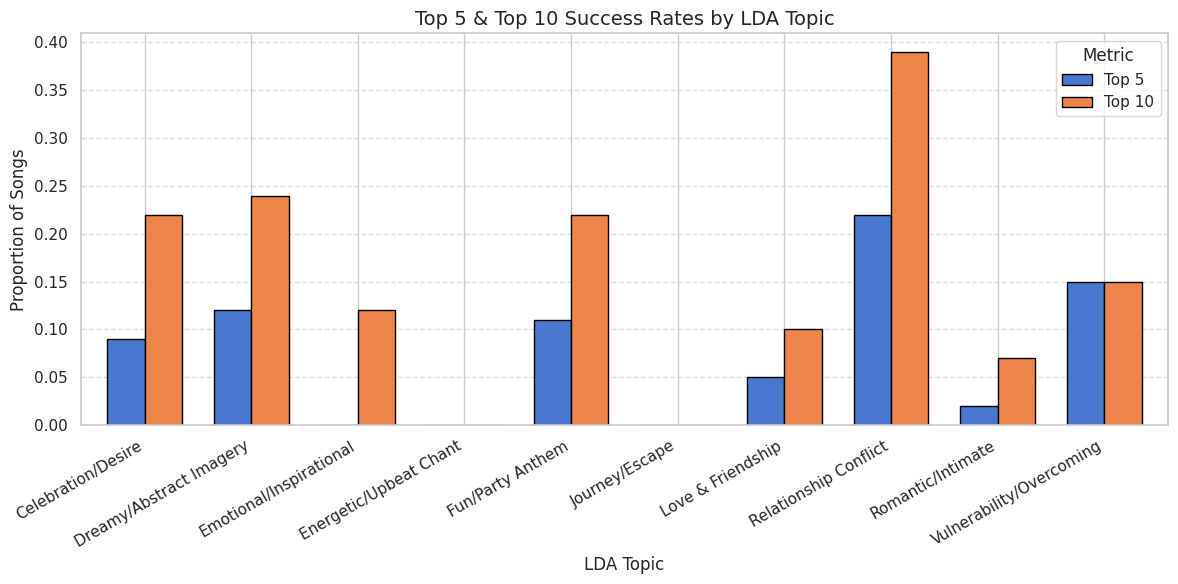

<Figure size 1200x600 with 0 Axes>

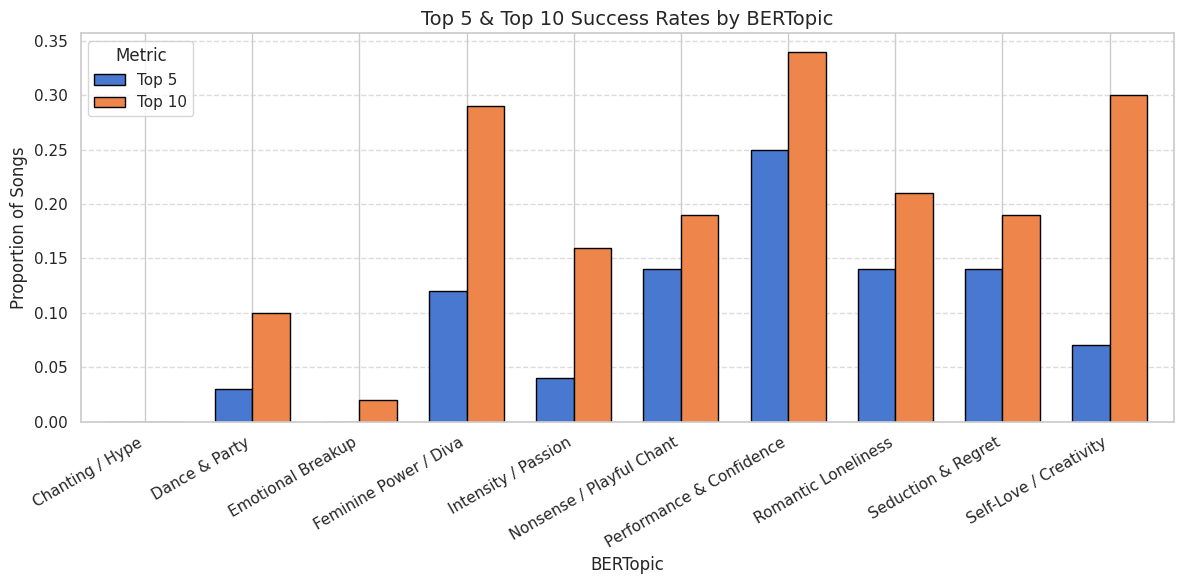

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics of interest
metrics = [
    "Final_Place", "Final_Points", "Top 5", "Top 10",
    "Grand_Final_Ind", "Semi_Place", "Semi_Points"
]

# LDA: Group and summarize
lda_summary = merged_df.groupby("LDA_Topic_Label")[metrics].mean().round(2)

# BERT: Group and summarize
bert_summary = merged_df.groupby("BERT_Topic_Label")[metrics].mean().round(2)

# Display summary tables
print("=== LDA Topic Summary ===")
print(lda_summary)
print("\n=== BERTopic Summary ===")
print(bert_summary)

# Set a clean style
sns.set(style="whitegrid", palette="muted")

# === LDA Plot ===
plt.figure(figsize=(12, 6))
lda_plot = lda_summary[["Top 5", "Top 10"]].plot(
    kind="bar",
    figsize=(12, 6),
    width=0.7,
    edgecolor="black"
)
plt.title("Top 5 & Top 10 Success Rates by LDA Topic", fontsize=14)
plt.ylabel("Proportion of Songs", fontsize=12)
plt.xlabel("LDA Topic", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metric")
plt.show()

# BERTopic Plot
plt.figure(figsize=(12, 6))
bert_plot = bert_summary[["Top 5", "Top 10"]].plot(
    kind="bar",
    figsize=(12, 6),
    width=0.7,
    edgecolor="black"
)
plt.title("Top 5 & Top 10 Success Rates by BERTopic", fontsize=14)
plt.ylabel("Proportion of Songs", fontsize=12)
plt.xlabel("BERTopic", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metric")
plt.show()

### Satistical modelling

In [64]:
# One-hot encode LDA topics
lda_dummies = pd.get_dummies(merged_df["LDA_Topic_Label"], prefix="LDA")

# One-hot encode BERT topics
bert_dummies = pd.get_dummies(merged_df["BERT_Topic_Label"], prefix="BERT")

# Combine with base DataFrame
X_lda = pd.concat([merged_df[["Grand_Final_Ind", "Top 10", "Top 5"]], lda_dummies], axis=1)
X_bert = pd.concat([merged_df[["Grand_Final_Ind", "Top 10", "Top 5"]], bert_dummies], axis=1)


In [65]:
# Fill 0 to the missing value
merged_df[["Top 5", "Top 10", "Grand_Final_Ind"]] = merged_df[["Top 5", "Top 10", "Grand_Final_Ind"]].fillna(0)

In [66]:
print(merged_df["LDA_Topic_Label"].value_counts())

LDA_Topic_Label
Celebration/Desire          52
Romantic/Intimate           47
Relationship Conflict       46
Fun/Party Anthem            45
Vulnerability/Overcoming    42
Love & Friendship           24
Energetic/Upbeat Chant      22
Journey/Escape              19
Emotional/Inspirational     18
Dreamy/Abstract Imagery     17
Name: count, dtype: int64


In [67]:
import statsmodels.api as sm
import pandas as pd


# One-hot encode topics
X = pd.get_dummies(merged_df["LDA_Topic_Label"], prefix="LDA")
y = merged_df["Top 10"]

# Add constant and ensure float dtype
X = sm.add_constant(X).astype(float)

# Fit Generalized Linear Model with Binomial family
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Top 10   No. Observations:                  358
Model:                            GLM   Df Residuals:                      347
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -133.78
Date:                Wed, 28 May 2025   Deviance:                       267.57
Time:                        08:13:35   Pearson chi2:                     317.
No. Iterations:                    22   Pseudo R-squ. (CS):            0.07814
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [68]:
# One-hot encode LDA topics
lda_dummies = pd.get_dummies(merged_df["LDA_Topic_Label"], prefix="LDA")

# Define predictors and outcome
X = lda_dummies
y = merged_df["Top 5"]

# Add constant and ensure float dtype
X = sm.add_constant(X).astype(float)

# Fit logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print statistical summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Top 5   No. Observations:                  358
Model:                            GLM   Df Residuals:                      347
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.577
Date:                Wed, 28 May 2025   Deviance:                       167.15
Time:                        08:13:35   Pearson chi2:                     299.
No. Iterations:                    23   Pseudo R-squ. (CS):            0.05242
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [69]:
# One-hot encode LDA topics
lda_dummies = pd.get_dummies(merged_df["LDA_Topic_Label"], prefix="LDA")

# Define predictors and outcome
X = lda_dummies
y = merged_df["Grand_Final_Ind"]

# Add constant and ensure float dtype
X = sm.add_constant(X).astype(float)

# Fit logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print statistical summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Grand_Final_Ind   No. Observations:                  358
Model:                            GLM   Df Residuals:                      347
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.47
Date:                Wed, 28 May 2025   Deviance:                       442.93
Time:                        08:13:35   Pearson chi2:                     358.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05503
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [70]:
# One-hot encode LDA topics
bert_dummies = pd.get_dummies(merged_df["BERT_Topic_Label"], prefix="BERT")

# Define predictors and outcome
X = bert_dummies
y = merged_df["Top 10"]

# Add constant and ensure float dtype
X = sm.add_constant(X).astype(float)

# Fit logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print statistical summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Top 10   No. Observations:                  358
Model:                            GLM   Df Residuals:                      347
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -134.99
Date:                Wed, 28 May 2025   Deviance:                       269.98
Time:                        08:13:35   Pearson chi2:                     329.
No. Iterations:                    22   Pseudo R-squ. (CS):            0.07192
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [71]:
# One-hot encode LDA topics
bert_dummies = pd.get_dummies(merged_df["BERT_Topic_Label"], prefix="BERT")

# Define predictors and outcome
X = bert_dummies
y = merged_df["Top 5"]

# Add constant and ensure float dtype
X = sm.add_constant(X).astype(float)

# Fit logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print statistical summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Top 5   No. Observations:                  358
Model:                            GLM   Df Residuals:                      347
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -82.388
Date:                Wed, 28 May 2025   Deviance:                       164.78
Time:                        08:13:35   Pearson chi2:                     285.
No. Iterations:                    23   Pseudo R-squ. (CS):            0.05870
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [72]:
# One-hot encode LDA topics
bert_dummies = pd.get_dummies(merged_df["BERT_Topic_Label"], prefix="BERT")

# Define predictors and outcome
X = bert_dummies
y = merged_df["Grand_Final_Ind"]

# Add constant and ensure float dtype
X = sm.add_constant(X).astype(float)

# Fit logistic regression model
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

# Print statistical summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Grand_Final_Ind   No. Observations:                  358
Model:                            GLM   Df Residuals:                      347
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -223.26
Date:                Wed, 28 May 2025   Deviance:                       446.52
Time:                        08:13:35   Pearson chi2:                     358.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.04553
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [73]:
print(X.dtypes)
print(y.dtypes)

const                            float64
BERT_Chanting / Hype             float64
BERT_Dance & Party               float64
BERT_Emotional Breakup           float64
BERT_Feminine Power / Diva       float64
BERT_Intensity / Passion         float64
BERT_Nonsense / Playful Chant    float64
BERT_Performance & Confidence    float64
BERT_Romantic Loneliness         float64
BERT_Seduction & Regret          float64
BERT_Self-Love / Creativity      float64
dtype: object
int64


In [74]:
import statsmodels.api as sm
import pandas as pd

# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Final_Points"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["LDA_Topic_Label"], prefix="LDA")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Final_Points"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Final_Points   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.243
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.265
Time:                        08:13:35   Log-Likelihood:                -1482.6
No. Observations:                 232   AIC:                             2987.
Df Residuals:                     221   BIC:                             3025.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [75]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Final_Place"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["LDA_Topic_Label"], prefix="LDA")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Final_Place"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Final_Place   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.157
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.322
Time:                        08:13:35   Log-Likelihood:                -788.92
No. Observations:                 232   AIC:                             1600.
Df Residuals:                     221   BIC:                             1638.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [76]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Semi_Place"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["LDA_Topic_Label"], prefix="LDA")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Semi_Place"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Semi_Place   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.675
Date:                Wed, 28 May 2025   Prob (F-statistic):            0.00381
Time:                        08:13:35   Log-Likelihood:                -907.53
No. Observations:                 305   AIC:                             1837.
Df Residuals:                     294   BIC:                             1878.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [77]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Semi_Points"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["LDA_Topic_Label"], prefix="LDA")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Semi_Points"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Semi_Points   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.586
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.110
Time:                        08:13:35   Log-Likelihood:                -1768.0
No. Observations:                 305   AIC:                             3558.
Df Residuals:                     294   BIC:                             3599.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [78]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Final_Points"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["BERT_Topic_Label"], prefix="BERT")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Final_Points"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Final_Points   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.268
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.250
Time:                        08:13:35   Log-Likelihood:                -1482.4
No. Observations:                 232   AIC:                             2987.
Df Residuals:                     221   BIC:                             3025.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [79]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Final_Place"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["BERT_Topic_Label"], prefix="BERT")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Final_Place"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Final_Place   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.462
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.155
Time:                        08:13:35   Log-Likelihood:                -787.41
No. Observations:                 232   AIC:                             1597.
Df Residuals:                     221   BIC:                             1635.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [80]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Semi_Place"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["BERT_Topic_Label"], prefix="BERT")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Semi_Place"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Semi_Place   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.6612
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.760
Time:                        08:13:35   Log-Likelihood:                -917.42
No. Observations:                 305   AIC:                             1857.
Df Residuals:                     294   BIC:                             1898.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [81]:
# Prepare data: drop missing values
merged_df_clean = merged_df.dropna(subset=["Semi_Points"])

# One-hot encode BERT topics
X = pd.get_dummies(merged_df_clean["BERT_Topic_Label"], prefix="BERT")
X = sm.add_constant(X)              # Add intercept term
X = X.astype(float)                 # Ensure numeric dtype

# Target variable
y = pd.to_numeric(merged_df_clean["Semi_Points"], errors="coerce")

# Fit model
model = sm.OLS(y, X).fit()

# Show full statistical summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Semi_Points   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.477
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.147
Time:                        08:13:35   Log-Likelihood:                -1768.6
No. Observations:                 305   AIC:                             3559.
Df Residuals:                     294   BIC:                             3600.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [82]:
import statsmodels.api as sm
import pandas as pd

# Clean 'Sex' column
sex_map = {"F": 0, "M": 1, "Mixed": 2}
merged_df["Sex_Clean"] = merged_df["Sex"].map(sex_map)

# Convert 'National_Language_Used' column to int (True/False to 1/0)
merged_df["National_Language_Used"] = merged_df["National_Language_Used"].astype(int)

# Replace the original column in features list with cleaned version
features_to_test = [
    "Solo_Artist", "Returning_Artist_Ind", "Number of Members",
    "Multiple_Language", "EU", "National_Language_Used", "Sex_Clean"
]

# Drop missing target values
df_clean = merged_df.dropna(subset=["Grand_Final_Ind"])
y = df_clean["Grand_Final_Ind"].astype(int)

for feature in features_to_test:
    X = df_clean[[feature]].copy()

    # Handle categorical variables
    if X[feature].dtype == "object":
        X = pd.get_dummies(X, drop_first=True)

    # Ensure all values are float for statsmodels
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    X = sm.add_constant(X)

    try:
        model = sm.Logit(y, X).fit(disp=False)
        print(f"\n=== Logistic Regression for: {feature} ===")
        print(model.summary())
    except Exception as e:
        print(f"\n[Error fitting model for: {feature}] {e}")



=== Logistic Regression for: Solo_Artist ===
                           Logit Regression Results                           
Dep. Variable:        Grand_Final_Ind   No. Observations:                  358
Model:                          Logit   Df Residuals:                      356
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 May 2025   Pseudo R-squ.:               0.0008264
Time:                        08:13:36   Log-Likelihood:                -231.41
converged:                       True   LL-Null:                       -231.60
Covariance Type:            nonrobust   LLR p-value:                    0.5361
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5108      0.211      2.423      0.015       0.098       0.924
Solo_Artist     0.1538      0.248      0.620      0.535      -0.332       0.640

=

### Model Evaluation

In [83]:
# One-hot encode topics and categorical variables
topic_dummies = pd.get_dummies(merged_df["BERT_Topic_Label"], prefix="Topic")
country_dummies = pd.get_dummies(merged_df["Country_Merge"], prefix="Country")
group_dummies = pd.get_dummies(merged_df["Country_Group"], prefix="Group")

In [84]:
# Define target variable for classification: whether the song reached the Grand Final (1) or not (0)
y_class = merged_df["Grand_Final_Ind"]

In [85]:
# Use only topic dummy variables as the feature set for modeling
X_topics = topic_dummies

In [86]:
 # Combine topic and country dummy variables as features
X_topic_country = pd.concat([topic_dummies, country_dummies], axis=1)

In [87]:

X_topic_country_artist = pd.concat([
    topic_dummies, # Topic-related features (e.g., LDA or BERT topics)
    country_dummies, # Country dummy variables
    group_dummies, # Regional groupings of countries
    merged_df[["Solo_Artist", "Returning_Artist_Ind", "Number of Members"]]
], axis=1).astype(float)


In [88]:
X_topic_country_artist_language = pd.concat([
    topic_dummies,
    country_dummies,
    group_dummies,
    merged_df[["Solo_Artist", "Returning_Artist_Ind", "Multiple_Language", "Number of Members", "National_Language_Used"]] # Add language related features
], axis=1).astype(float)


In [89]:
X_long = pd.concat([
    topic_dummies,
    country_dummies,
    group_dummies,
    merged_df[["Solo_Artist", "Returning_Artist_Ind", "Multiple_Language", "Number of Members", "National_Language_Used", "EU"]] # Add region related features
], axis=1).astype(float)


In [90]:
# Define numeric features
numeric_features = merged_df[[
    "Solo_Artist", "Returning_Artist_Ind", "Number of Members",
    "Multiple_Language", "EU", "National_Language_Used", "Sex_Clean"
]]

# Combine all features into design matrix X
X_full = pd.concat([
    topic_dummies,
    country_dummies,
    group_dummies,
    numeric_features,
], axis=1).astype(float)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score


for name, X_variant in [("Topics Only", X_topics), ("Topic+Country", X_topic_country), ("Topic+Country+Artist", X_topic_country_artist), ("Topic+Country+Artist+Language", X_topic_country_artist_language), ("Longlist", X_long), ("full", X_full)]:
    X_train, X_test, y_train, y_test = train_test_split(X_variant, y_class, test_size=0.2, random_state=42, stratify=y_class)

    clf = RandomForestClassifier(random_state=42, class_weight="balanced")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, y_pred))


=== Classification Report: Topics Only ===
              precision    recall  f1-score   support

           0       0.39      0.48      0.43        25
           1       0.68      0.60      0.64        47

    accuracy                           0.56        72
   macro avg       0.54      0.54      0.53        72
weighted avg       0.58      0.56      0.56        72


=== Classification Report: Topic+Country ===
              precision    recall  f1-score   support

           0       0.62      0.32      0.42        25
           1       0.71      0.89      0.79        47

    accuracy                           0.69        72
   macro avg       0.66      0.61      0.61        72
weighted avg       0.68      0.69      0.66        72


=== Classification Report: Topic+Country+Artist ===
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        25
           1       0.76      0.87      0.81        47

    accuracy                           

### Statistical Modelling for the best-performed model

In [92]:
import statsmodels.api as sm

# Define predictors and outcome
X = X_topic_country_artist_language.copy()  # Best-performing features
X = sm.add_constant(X)  # Add constant/intercept

y = merged_df["Grand_Final_Ind"]  # Binary outcome (1 = made it to final)

logit_model = sm.Logit(y, X) # Fit the model
result = logit_model.fit()

# Print detailed statistical summary
print(result.summary())


         Current function value: 0.436392
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        Grand_Final_Ind   No. Observations:                  358
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                           60
Date:                Wed, 28 May 2025   Pseudo R-squ.:                  0.3254
Time:                        08:13:37   Log-Likelihood:                -156.23
converged:                      False   LL-Null:                       -231.60
Covariance Type:            nonrobust   LLR p-value:                 9.217e-10
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.7274   2.78e+07   6.21e-08      1.000   -5.45e+07    5.45e+07
Topic

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
